In [1]:
from pathlib import Path
import os
_cwd = os.getcwd()
from pathlib import Path
import os

_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()
fig_path = Path("./figures/")
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

import numpy as np
import torch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

%matplotlib inline

# ------- internal imports
from models import GenerativeAE
import models, metrics, experiments, datasets
from metrics import score_disentanglement 
from experiments import EvaluationManager
from experiments.EvaluationManager import ModelHandler, VisualModelHandler, VectorModelHandler
from visualisations import ModelVisualiser, SynthVecDataVisualiser
from datasets import synth_dataset 
import visualisations
from visualisations import visualise_data, visualise_model

In [2]:
import importlib
importlib.reload(experiments.EvaluationManager)

<module 'experiments.EvaluationManager' from 'C:\\Users\\Giulia\\Study\\projects\\research\\SAE\\experiments\\EvaluationManager.py'>

--- 

# Reconstructions 

In [117]:
params = {"model_name":"XCSAE",
          "model_version":"xunit_dim4random_seed13",
          "data" : "MNIST"}

In [121]:
# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

configs/models/XCSAE/xunit_dim4random_seed13.yaml
128
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCSAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XCSAE\xunit_dim4random_seed13_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-

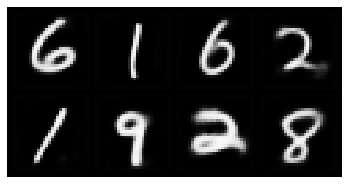

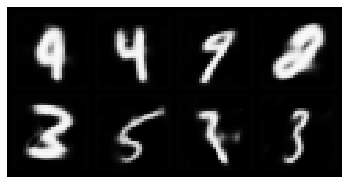

In [9]:
figure_params = {"figsize":(6,12), "new_batch":True, "num_plots":8,"num_pics":8, "grid_size":4}
# warming up the prior 
res = handler.plot_model(do_reconstructions=True, do_random_samples=True, **figure_params)

In [124]:

fig = res['reconstructions']
fname = fig_path / ("reconstructions_"+params["model_name"]+params["model_version"]+".png")
fig.savefig(fname, bbox_inches='tight', pad_inches=0)



fig = res['random_samples']
fname = fig_path / ("random_samples_"+params["model_name"]+params["model_version"]+".png")
fig.savefig(fname, bbox_inches='tight', pad_inches=0)

# Traversals

In [11]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

In [12]:
# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

configs/models/XCAE/standardS.yaml
128
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XCAE\standardS_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]  

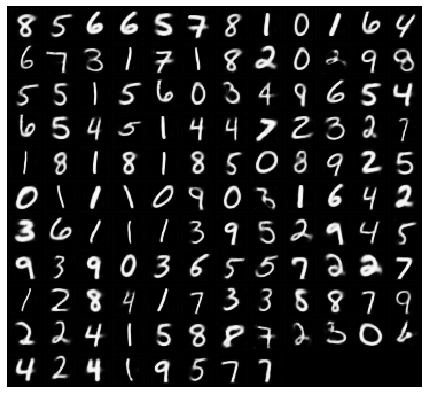

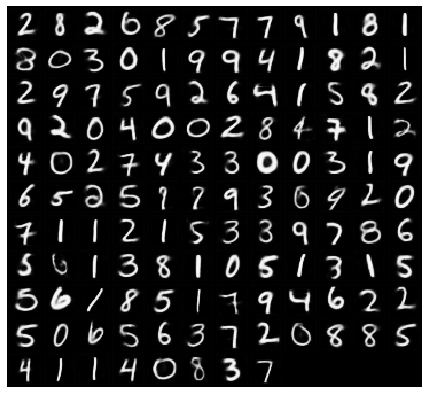

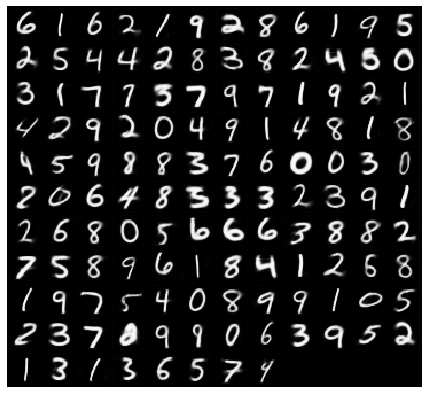

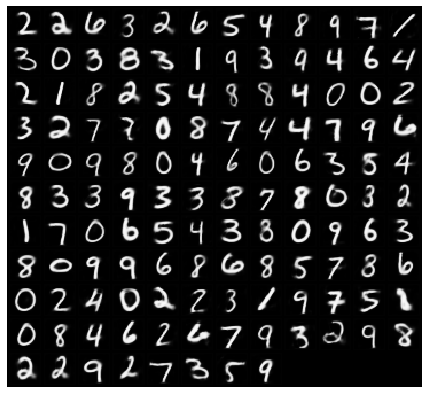

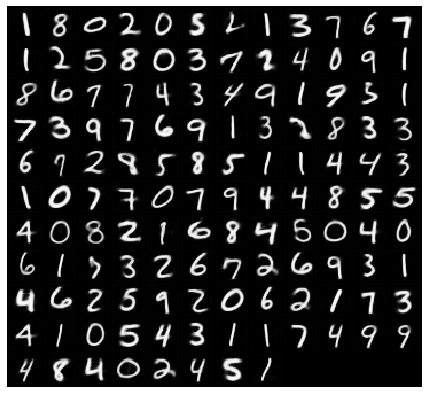

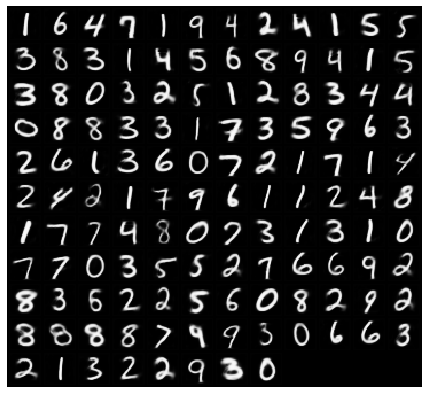

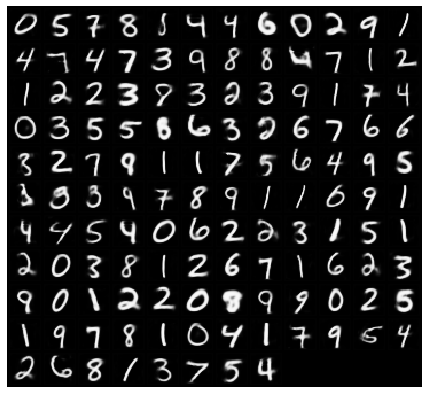

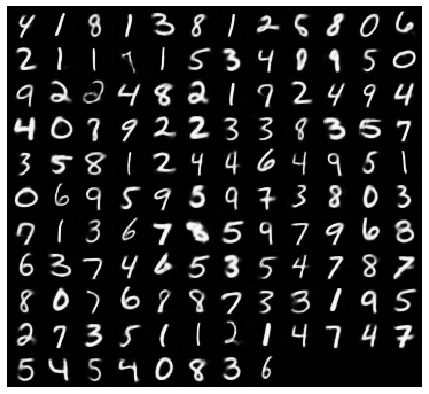

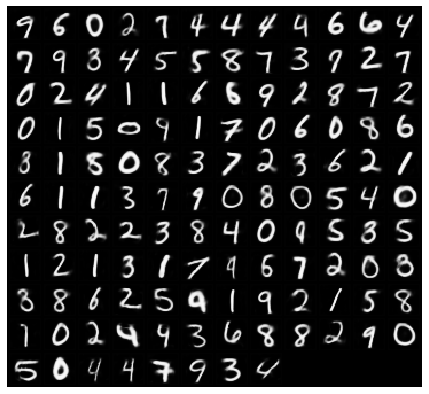

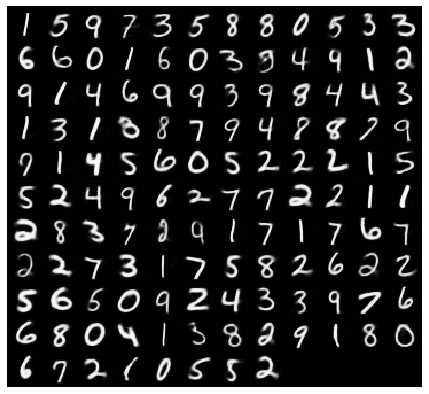

In [13]:
figure_params = {"figsize":(12,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

Computing latent traversals ... 
...done


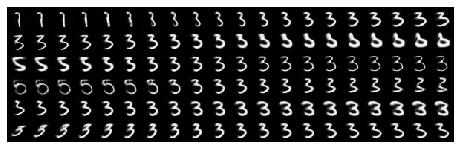

In [19]:
figure_params = {"figsize":(8,10), "new_batch":True}
other_args = {"num_samples":1, "steps":20, "prior_mode":"posterior", "relative":False}
res = handler.plot_model(do_traversals=True, **figure_params, **other_args)

In [220]:

fig = res['traversals']
fname = fig_path / ("traversals_"+params["model_name"]+params["model_version"]+".png")
fig.savefig(fname, bbox_inches='tight', pad_inches=0)


In [313]:
"traversals_"+params["model_name"]+".png"

'traversals_XCAE.png'

# Hybrids

In [2]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

In [3]:
# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

configs/models/XCAE/standardS.yaml
128
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XCAE\standardS_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
        MaxPool2d-11             [-1, 32, 7, 7]               0
             Mish-12             [-1, 32, 7, 7]               0
      BatchNorm2d-13             [-1, 32, 7, 7]              64
        ConvBlock-14             [-1, 3

26
Computing latent traversals ... 
...done
Plotting hybridisation on the noise variables


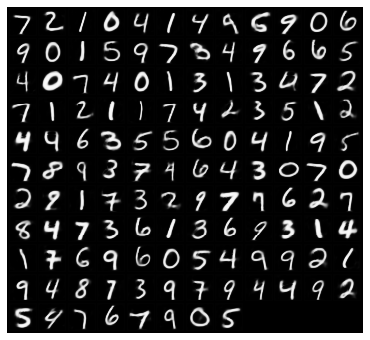

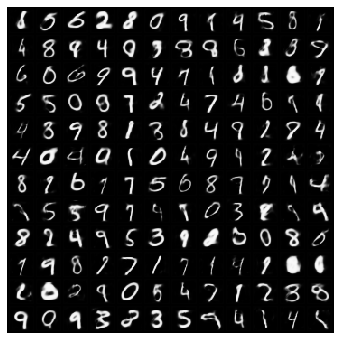

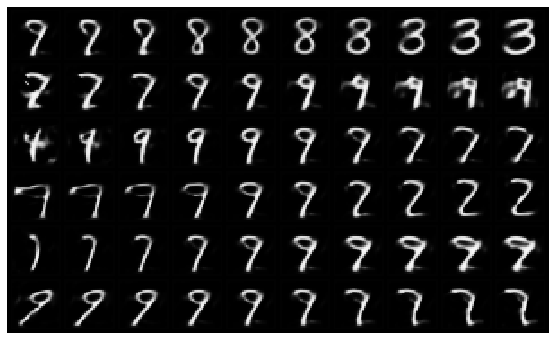

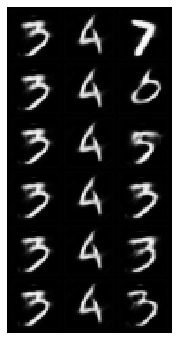

In [6]:
seed = np.random.randint(100); print(seed)
res = handler.plot_model(do_originals=False, do_reconstructions=True,
                         do_random_samples=True, do_traversals=True, 
                         do_hybrisation=True, do_loss2distortion=False, 
                         do_marginal=False, do_loss2marginal=False, 
                         figsize=(10,6), seed=seed, num_samples=1, steps=10)
fig = res['hybridsN']
fname = fig_path / ("hybrids"+params["model_name"]+".png")
fig.savefig(fname)


# Distortion

In [ ]:
params = {"model_name":"XAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

In [ ]:
figure_params = {"figsize":(20,30), "nrows":3, "N":100, "x_scale":1.0, "steps":21}

res = handler.plot_model(do_originals=False, do_reconstructions=False,
                         do_random_samples=False, do_traversals=False, 
                         do_loss2distortion=True, do_marginal=False, 
                         do_loss2marginal=False, **figure_params)
fig = res['distortion']
fname = fig_path / ("distortion"+params["model_name"]+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)

In [ ]:
figure_params = {"figsize":(20,30), "nrows":3, "N":100, "relative":False, "ro":0.01}

res = handler.plot_model(do_originals=False, do_reconstructions=False,
                         do_random_samples=False, do_traversals=False, 
                         do_loss2distortion=False, do_marginal=False, 
                         do_loss2marginal=True, **figure_params)
fig = res['marginal_distortion']
fname = fig_path / ("marginal_distortion"+params["model_name"]+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)

In [ ]:
figure_params = {"figsize":(20,30), "nrows":3, "N":100, "markersize":10, "font_scale":10}

res = handler.plot_model(do_originals=False, do_reconstructions=False,
                         do_random_samples=False, do_traversals=False, 
                         do_loss2distortion=False, do_marginal=True, 
                         do_loss2marginal=False, **figure_params)
fig = res['marginal']
fname = fig_path / ("marginal"+params["model_name"]+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)

# Latent Response

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data_version":"standard",
          "data" : "MNIST"}

# load handler
handler = ModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"

In [ ]:
LR = handler.latent_responses(load=True).cpu()

In [ ]:
#https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb
fig = plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.0)
ax = sns.heatmap(LR, linecolor='white', linewidth=1,  cmap="Greens", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

fname = fig_path / ("responses"+params["model_name"]+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)
print(str(fname)+" saved")

In [ ]:
def draw_graph(matrix, **kwargs):
    """
    kwargs accepted keys: 
    - threshold
    - num_bins (used to discretise the edges weights and assign them colors)
    - figsize
    """
    threshold = kwargs.get('threshold',1.0)
    num_bins = kwargs.get('num_bins',100)
    figsize = kwargs.get('figsize', (8,6))

    graph_adj = torch.max(matrix-threshold,torch.zeros_like(matrix))
    G = nx.from_numpy_matrix(np.matrix(graph_adj), create_using=nx.DiGraph)
    pos = nx.circular_layout(G)
    edges = G.edges()
    weights = [graph_adj[u][v] for u,v in edges]
    weights = np.digitize(weights, np.histogram(weights, num_bins)[1][:-1])
    
    options = {
    "node_color": "#A0CBE2",
    "edge_color": weights,
    "width": 4,
    "edge_cmap": plt.cm.Greens,
    "with_labels": True,
    "font_color": "white",
    }

    fig = plt.figure(figsize=figsize)
    nx.draw(G, pos=pos, **options)
    return fig

In [ ]:
fig = draw_graph(LR)
plt.show()    
fname = fig_path / ("latent_graph"+params["model_name"]+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)
print(str(fname)+" saved")

In [ ]:
true_matrix = handler.dataloader.train.dataset.dataset.get_graph_matrix()
fig = plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.0)
ax = sns.heatmap(true_matrix, linecolor='white', linewidth=1,  cmap="Greens", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

fname = fig_path / ("standardVec_graph.png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname)
print(str(fname)+" saved")

--- 

# Drifts

In [ ]:
params = {"model_name":"AE",
          "model_version":"standardS",
          "data_version":"standard",
          "data" : "MNIST"}

# load handler
handler = ModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"

In [ ]:
drift_evalutation_params = {
    "num_batches":10,
    "num_interventions":50,
    "num_samples":50,
    "reduce":"mean"}

drift_scorer_params = {
    "random_seed":11,
    "independent":True,
    "verbose":True}

In [ ]:
individual_drifts, interventions = handler.evaluate_drift(pairwise=True, **drift_evalutation_params, **drift_scorer_params)

In [ ]:
pairwise_drifts, pairwise_effects = handler.load_pairwise_results()
visualiser = ModelVisualiser(handler.model, handler.dataloader.test, **handler.config["vis_params"])
visualiser.plot_heatmap(pairwise_drifts, figsize=(8,6))
visualiser.plot_heatmap(pairwise_effects, figsize=(8,6))

# Causal block

Plotting the adjacency matrix obtained from the masks in the causal latent block of the X-models

In [20]:
from experiments.utils import get_causal_block_graph, temperature_exponential_annealing

In [29]:
params = {"model_name":"XVAE",
          "model_version":"standardSrandom_seed13",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint()


configs/models/XVAE/standardSrandom_seed13.yaml
128
Initialising schedulers Manager...
Variational mode ON
Explicit mode ON
XVAE model hanlder loaded.
Tau set to 1.0
Loading latest checkpoint at logs\XVAE\standardSrandom_seed13_MNIST\checkpoints\epoch=223-step=73437.ckpt .
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
   

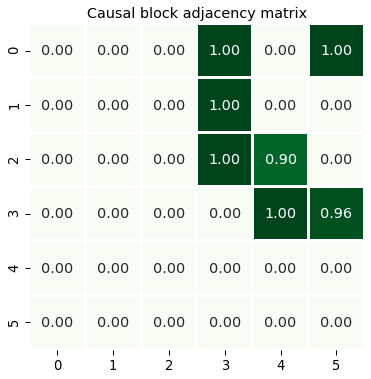

In [30]:
handler.visualiser = ModelVisualiser(handler.model, handler.dataloader.test, **handler.config["vis_params"])
figure_params = {"figsize":(handler.model.latent_size,handler.model.latent_size),
                 "nrows":3, "N":100, "markersize":10, "font_scale":10, "vmin":0.0, "vmax":1.0, "cbar":False}

tau = temperature_exponential_annealing(100000)

A = get_causal_block_graph(handler.model, handler.model_name, handler.device, tau=tau)
fig = handler.visualiser.plot_heatmap(A.detach().cpu(),title="Causal block adjacency matrix",
                                      threshold=0.0, **figure_params)

In [85]:
fname = fig_path / ("Xmasks_"+params["model_name"]+params['model_version']+".png")
fig.savefig(fname, bbox_inches='tight', pad_inches=0)


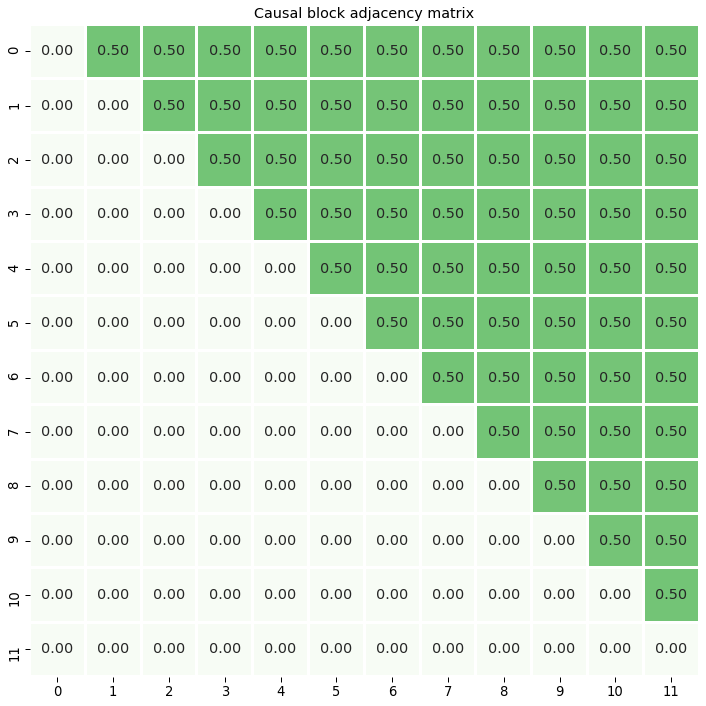

In [67]:
 
tau = temperature_exponential_annealing(100000)

A = get_causal_block_graph(handler.model, handler.model_name, handler.device, tau=tau)
fig = handler.visualiser.plot_heatmap(A.detach().cpu(),title="Causal block adjacency matrix",
                                      threshold=0.0, **figure_params)

# Traversal Responses

In [50]:
model_name = "XAE"
params = {"model_name":model_name,
          "model_version":"xunit_dim4",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

configs/models/XAE/xunit_dim4.yaml
128
Initialising schedulers Manager...
Explicit mode ON
XAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XAE\xunit_dim4_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
 

Computing traversal responses ... 
...done

Plotting traversal responses for dimension 0


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

KeyboardInterrupt: 

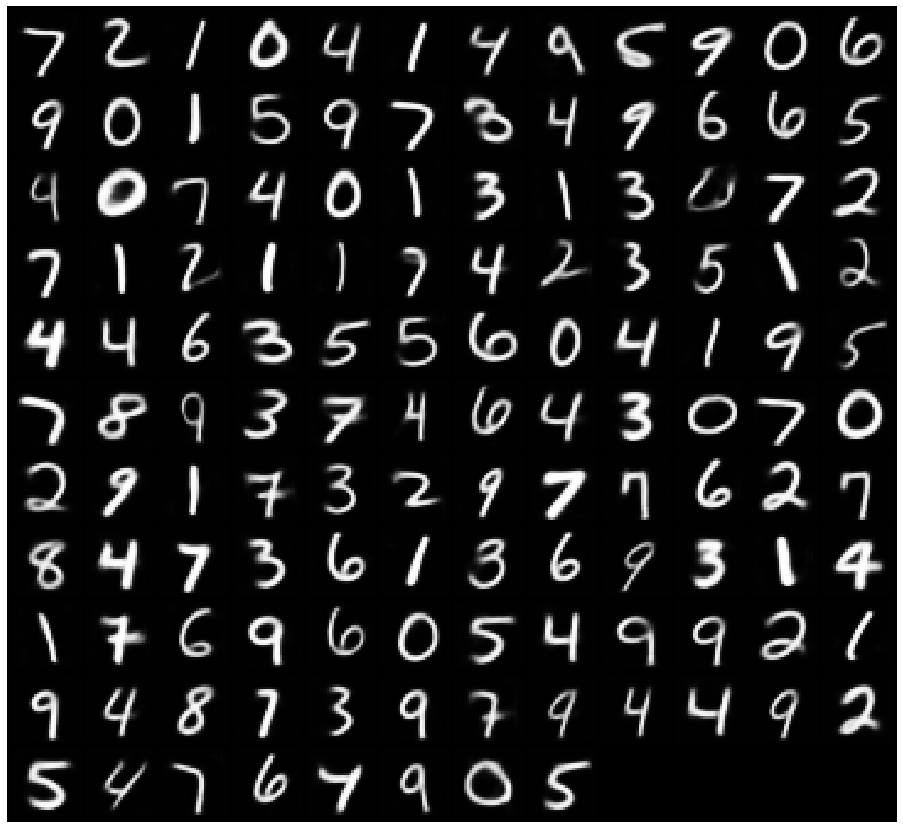

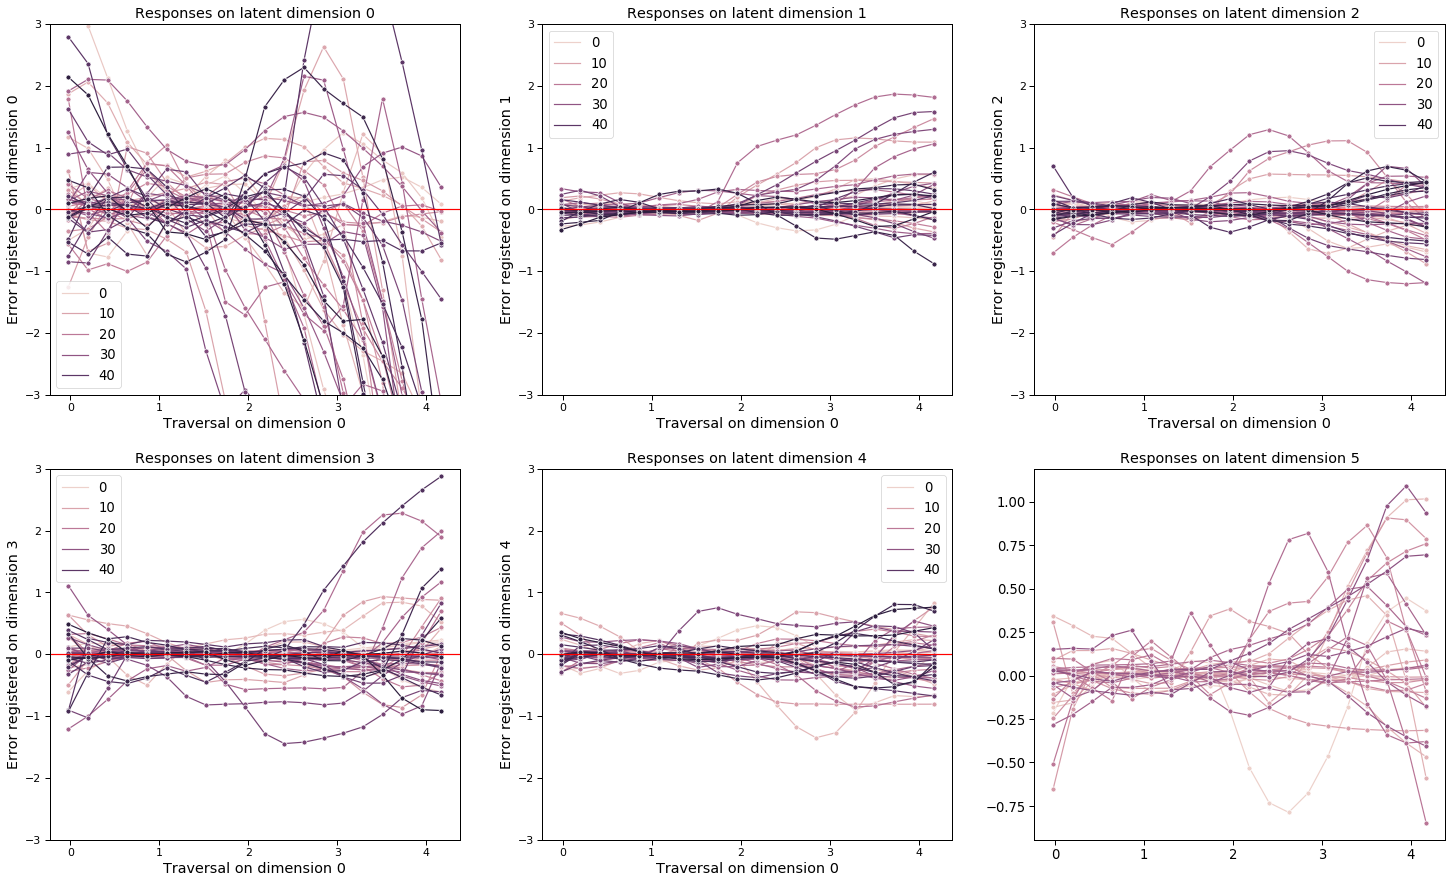

In [51]:
figure_params = {"figsize":(25,15), "nrows":2, "population":False, 
                 "normalise":True, "markersize":10, "font_scale":11, "ylim":3}
other_args = {"num_samples":50, "steps":20, "prior_mode":"posterior", "relative":False}

res = handler.plot_model(do_originals=False, do_reconstructions=True,
                         do_random_samples=False, do_traversals=False, 
                         do_loss2distortion=False, do_marginal=False, 
                         do_loss2marginal=False, do_traversal_responses=True, 
                         **figure_params, **other_args)

In [48]:
res['trvs_responses']


[<Figure size 1800x1080 with 6 Axes>,
 <Figure size 1800x1080 with 6 Axes>,
 <Figure size 1800x1080 with 6 Axes>,
 <Figure size 1800x1080 with 6 Axes>,
 <Figure size 1800x1080 with 6 Axes>,
 <Figure size 1800x1080 with 6 Axes>]

In [ ]:
add_info = "E"
for i,fig in enumerate(res['trvs_responses']):
    fname = fig_path / ("trvs_responses_"+params["model_name"]+f'_{add_info}_{i}'+".png")
    fig.savefig(fname, bbox_inches='tight', pad_inches=0)
    print(f"Saving {fname}")

In [97]:
fig = res['trvs_responses'][5]
fname = fig_path / ("trvs_responses_"+params["model_name"]+"_E"+".png")
if os.path.isfile(fname):
    os.remove(fname)
fig.savefig(fname, bbox_inches='tight', pad_inches=0)

In [96]:
"trvs_responses_"+params["model_name"]+"_E"+".png"

'trvs_responses_XCAE_E.png'

## Response field

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

In [ ]:
i = 2; j = 5;
figure_params = {"figsize":(9,7), "title":"Latent Response Mean Field", "i":i, "j":j, 
                 "type":"contour", "contour_n":20, "surface":True}
other_args = {"num_samples":10, "grid_size":10, "prior_mode":"hybrid"}

res = handler.plot_model(do_reconstructions=True, 
                         do_marginal=False,  
                         do_latent_response_field=True,
                         **figure_params, **other_args)

## X joint marginals

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
#handler.reset_tau(100000)

In [ ]:
figure_params = {"figsize":(9,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

In [ ]:

for i in range(6):
    for j in range(i):
        other_args = {"i":i, "j":j, "num_samples":20, "marginal_samples":100, 
                      "prior_mode":"uniform", "with_line":True}
        res = handler.plot_model(do_reconstructions=False, 
                                 do_marginal=False, 
                                 do_jointXmarginals=True,
                                 **figure_params, **other_args)

## Hybrids

In [31]:
model_name = "XCAE"
model_version = "standardS"
params = {"model_name":model_name,
          "model_version":model_version,
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

configs/models/XCAE/standardS.yaml
128
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XCAE\standardS_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]  

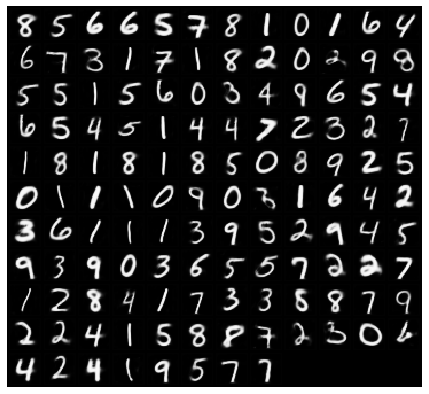

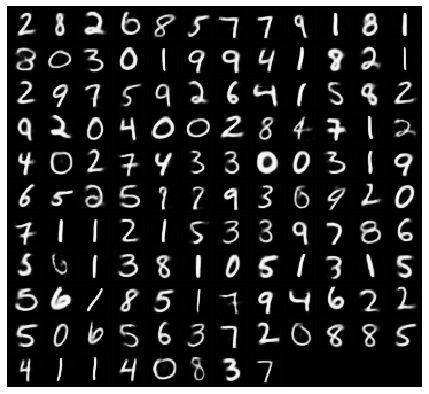

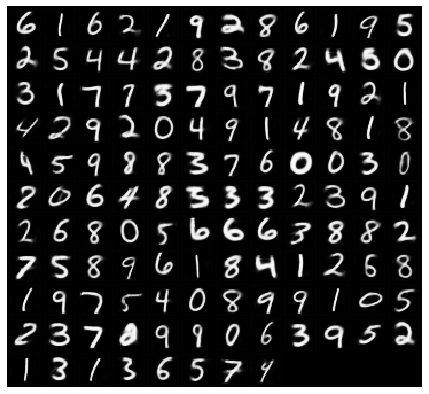

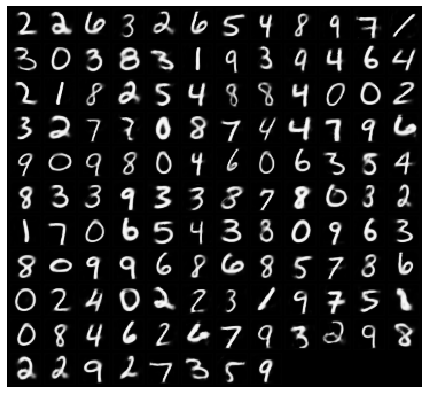

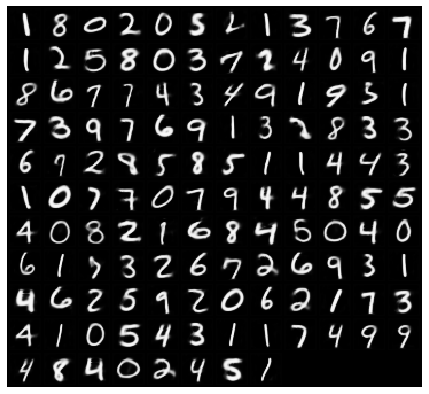

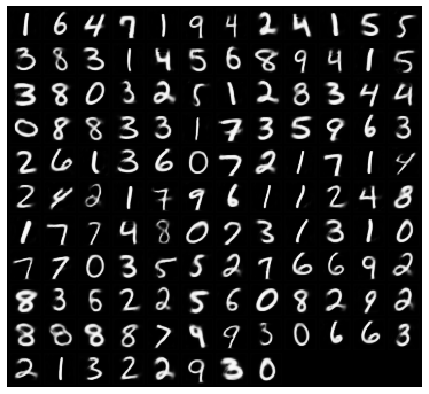

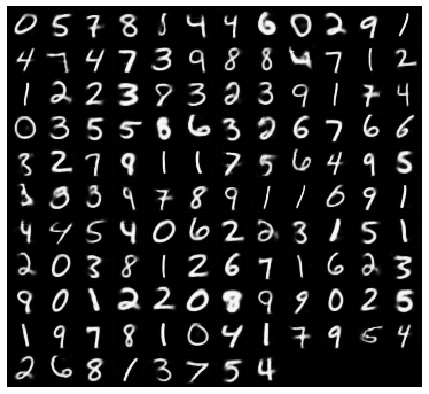

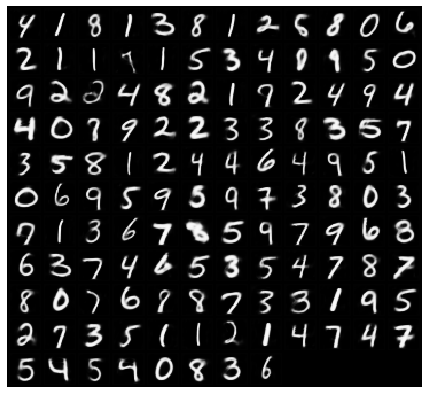

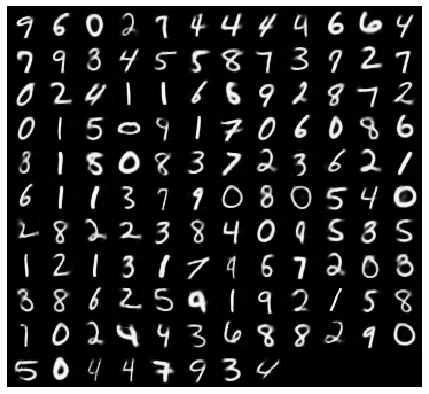

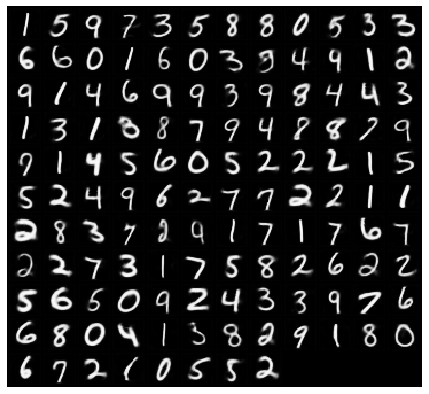

In [32]:
figure_params = {"figsize":(9,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

In [33]:
from visualisations import vis_latents, vis_xnets

Plotting hybridisation on the noise variables


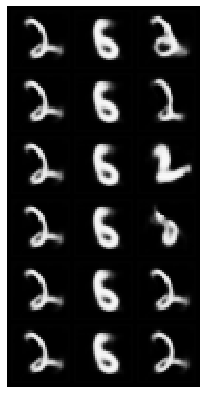

In [42]:
# plotting from the same samples for comparison 

print(f"Plotting hybridisation on the noise variables")
other_args = {"prior_mode":"posterior", "single_sample":True}
hybrids, base , other  = vis_latents.hybridiseN(handler.model, handler.device, **other_args)
figN = handler.visualiser.plot_grid(hybrids, nrow=3, **figure_params)
            
#print(f"Plotting hybridisation on the causal variables")
#hybrids, base , other = vis_xnets.hybridiseX(handler.model, handler.device, base=base, other=other, **other_args)
#figX = handler.visualiser.plot_grid(hybrids, nrow=3, **figure_params)

In [154]:
fname = fig_path / ("hybrids_"+model_name+".png")
figN.savefig(fname, bbox_inches='tight', pad_inches=0)
print(f"Saving to {fname}")

Saving to figures\hybrids_XCAE.png


## Double hybridisation on N and X

In [101]:
params = {"model_name":"XAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

configs/models/XAE/standardS.yaml
128
Initialising schedulers Manager...
Explicit mode ON
XAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XAE\standardS_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
   

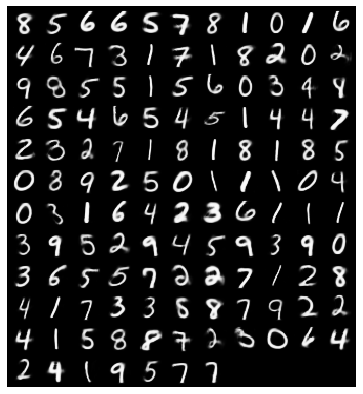

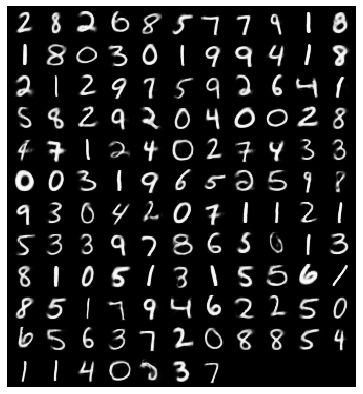

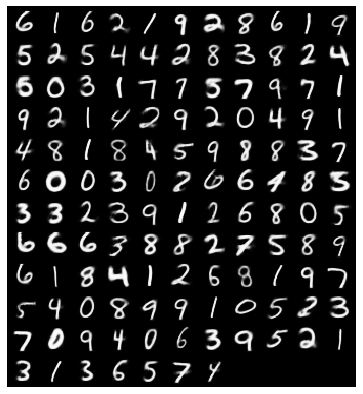

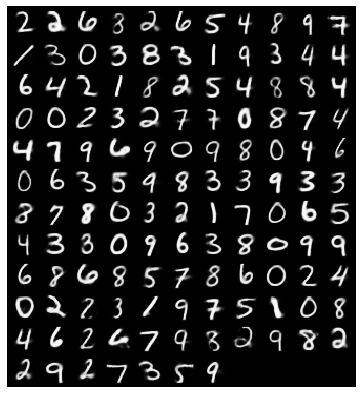

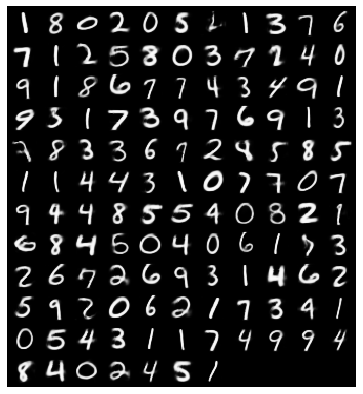

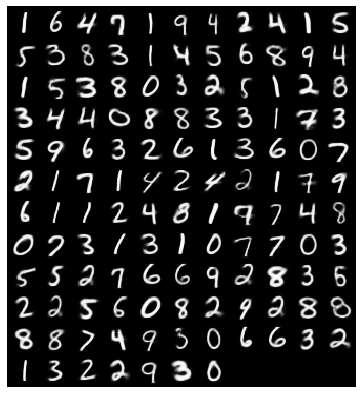

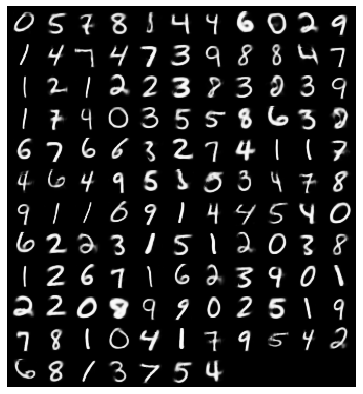

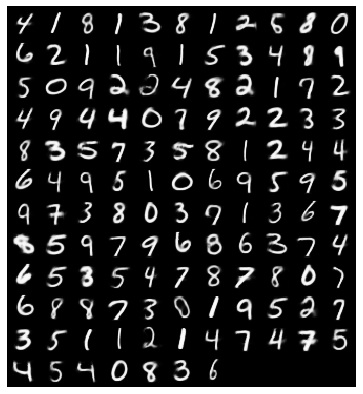

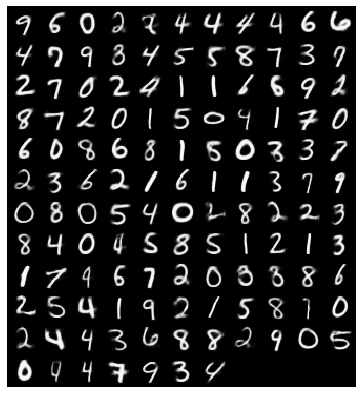

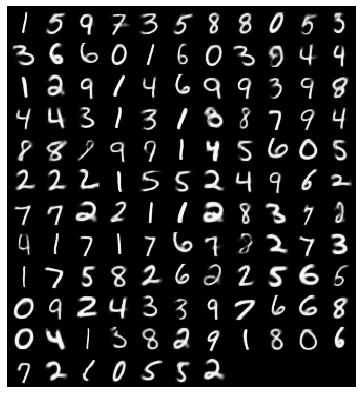

In [102]:
figure_params = {"figsize":(9,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

Plotting double hybridisation on the noise and causal variables


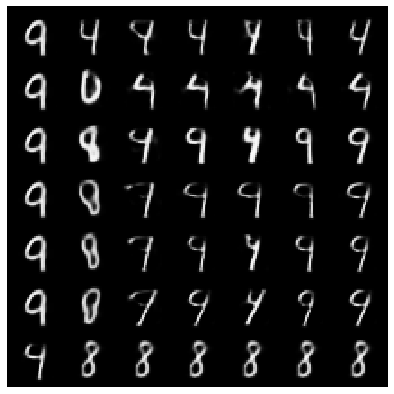

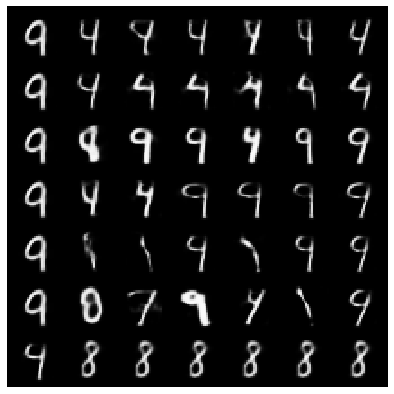

In [106]:
# plotting from the same samples for comparison 

other_args = {"prior_mode":"posterior", "single_sample":True}
res = handler.plot_model(do_reconstructions=False,   
                         do_double_hybridsXN=True,
                         **figure_params, **other_args)
            

## Multidim unit marginals 

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"xunit_dim4",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

In [ ]:
figure_params = {"figsize":(9,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

In [ ]:
for u in range(6): 
    figure_params = {"figsize":(9,7), "title":f"2D plot of unit {u}","with_points":True}
    other_args = {"num_samples":1000, "prior_mode":"posterior", "unit":u}

    res = handler.plot_model(do_reconstructions=False,   
                         do_unitMarginal=True,
                         **figure_params, **other_args)

## Marginal X 

(only for univariate models)

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

In [ ]:
figure_params = {"figsize":(14,14), "pair":True, "bins":200}
other_args = {"num_batches":10, "prior_mode":"posterior"}

res = handler.plot_model(do_reconstructions=False, do_marginalX=True, **figure_params, **other_args)

## X response field

(only for univariate models)

In [ ]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

In [ ]:
i = 2; j = 5;
figure_params = {"figsize":(9,7), "title":"X Response Mean Field", "i":i, "j":j, 
                 "type":"contour", "contour_n":20, "surface":True, "range_limit":10}
other_args = {"num_samples":30, "grid_size":10, "prior_mode":"hybrid"}

res = handler.plot_model(do_reconstructions=False, do_latent_response_fieldX=True, **figure_params, **other_args)

## N-X relation

In [2]:
params = {"model_name":"XCAE",
          "model_version":"xunit_dim4",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')
handler.reset_tau(100000)

configs/models/XCAE/xunit_dim4.yaml
128
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCAE model hanlder loaded.
Tau set to 1.0
Loading selected checkpoint at logs\XCAE\xunit_dim4_MNIST\checkpoints/final.ckpt
128
MODEL SUMMARY


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
        MaxPool2d-11             [-1, 32, 7, 7]               0
             Mish-12             [-1, 32, 7, 7]               0
      BatchNorm2d-13             [-1, 32, 7, 7]              64
        ConvBlock-14             [-1, 3

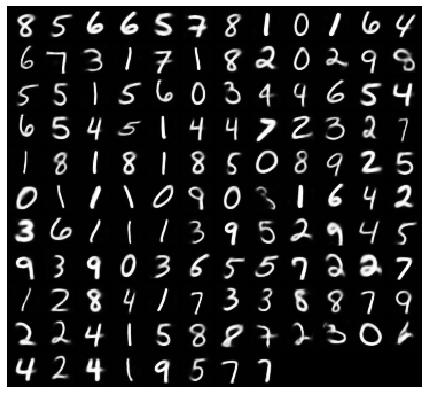

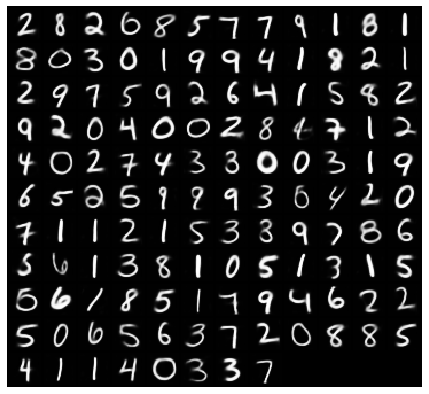

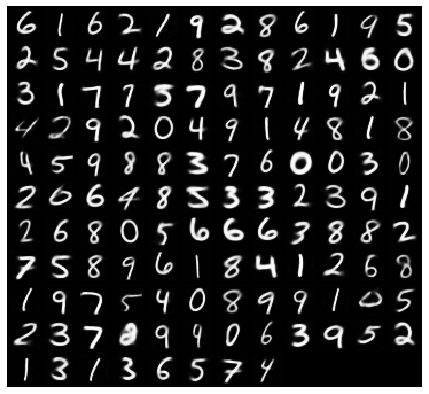

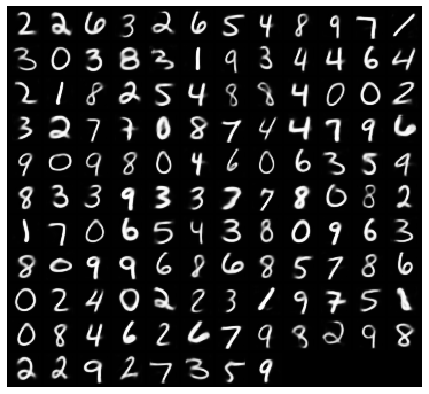

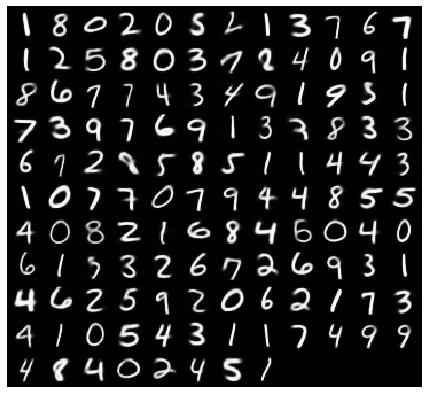

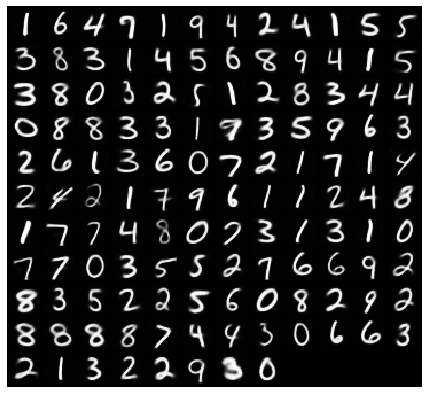

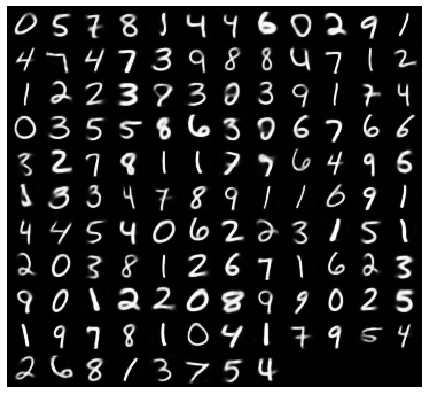

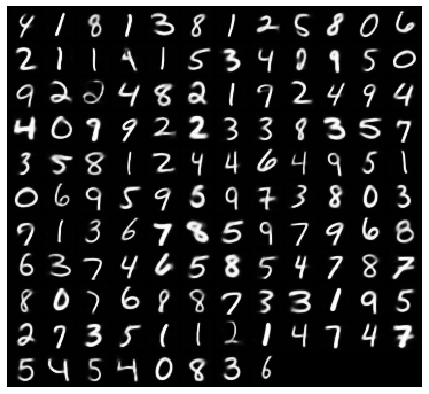

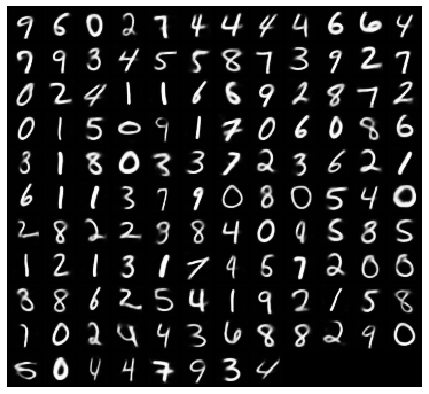

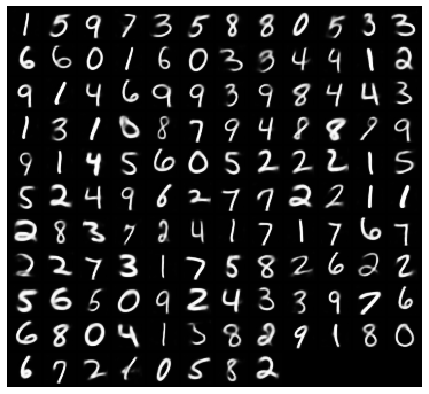

In [3]:
figure_params = {"figsize":(9,7), "new_batch":True}
# warming up the prior 
for w in range(10): res = handler.plot_model(do_reconstructions=True, **figure_params)

Plotting N0-X3 joint marginal
Computing joint between N0 and X3


c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

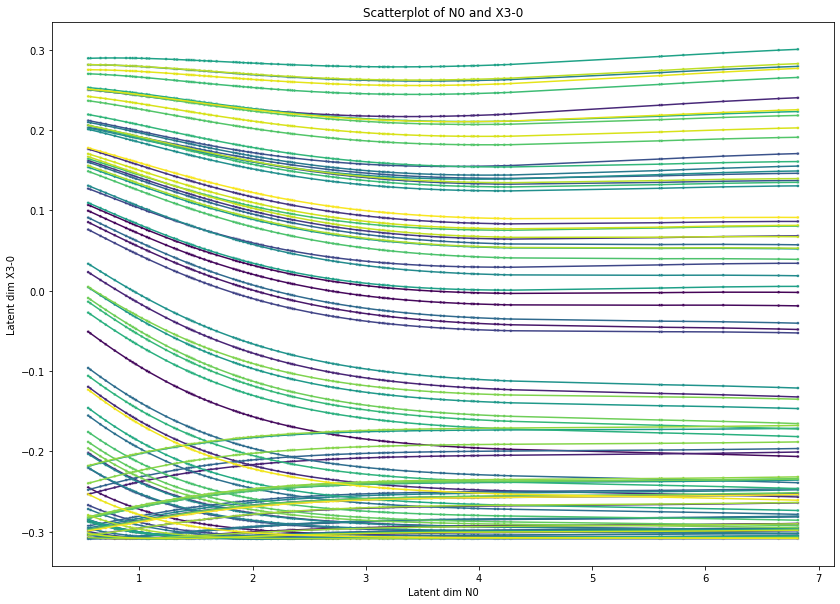

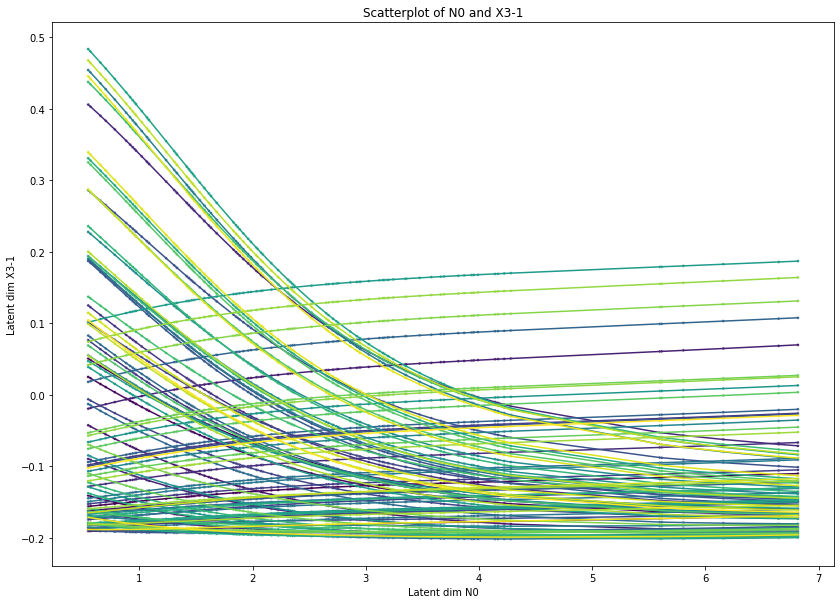

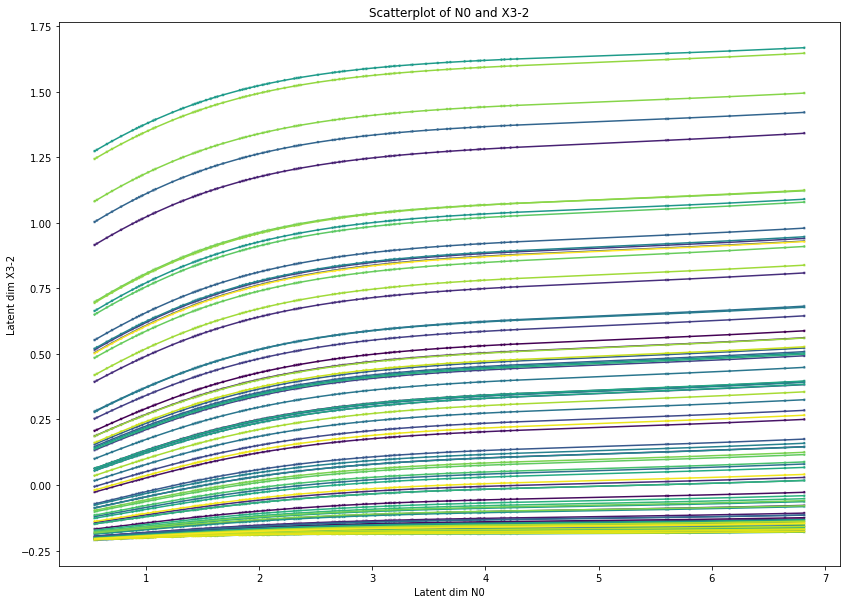

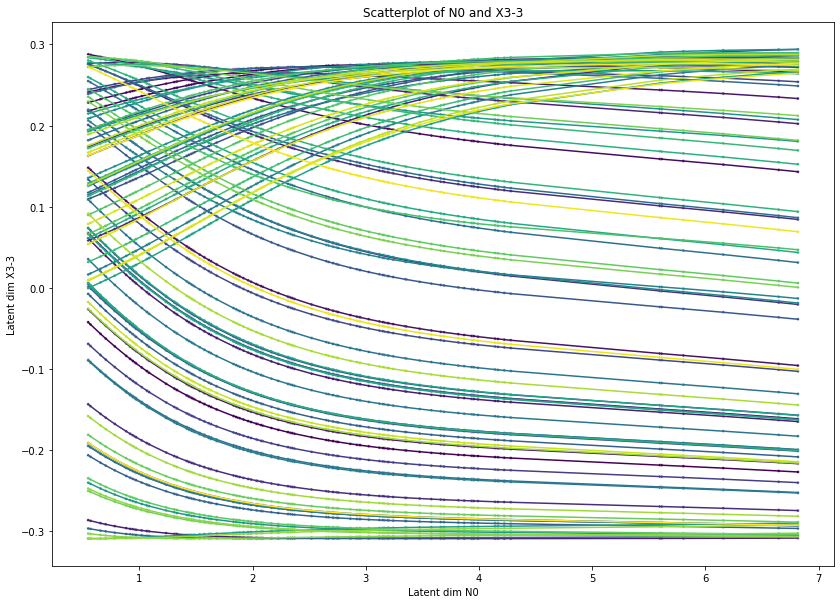

In [13]:
figure_params = {"figsize":(14,10), "new_batch":True}
i = 0; j=3;
other_args = {"dimN":i, "dimX":j, "num_samples":100, "marginal_samples":100, 
              "prior_mode":"posterior", "with_line":True}
fig = handler.plot_model(do_reconstructions=False, do_N2X=True,
                         **figure_params, **other_args)

In [7]:
fig

{'Xij': [<Figure size 1008x720 with 1 Axes>,
  <Figure size 1008x720 with 1 Axes>,
  <Figure size 1008x720 with 1 Axes>,
  <Figure size 1008x720 with 1 Axes>]}

In [14]:
add_info = "I"
for i,fig in enumerate(fig['Xij']):
    fname = fig_path / ("X03_"+params["model_name"]+f'_{add_info}_{i}'+".png")
    fig.savefig(fname, bbox_inches='tight', pad_inches=0)
    print(f"Saving {fname}")

Saving figures\X03_XCAE_I_0.png
Saving figures\X03_XCAE_I_1.png
Saving figures\X03_XCAE_I_2.png
Saving figures\X03_XCAE_I_3.png


In [ ]:

for i in range(6):
    other_args = {"dim":i, "num_samples":100, "marginal_samples":100, 
                  "prior_mode":"uniform", "with_line":True}
    res = handler.plot_model(do_reconstructions=False, do_N2X=True,
                             **figure_params, **other_args)

## Interpolation

In [ ]:
params = {"model_name":"XCVAE",
          "model_version":"xunit_dim4",
          "data" : "MNIST"}

# load handler
handler = VisualModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint()
handler.reset_tau(100000)

In [ ]:
figure_params = {"figsize":(20,10)}
other_args = {"random_seed":13,"num_steps":20}
res = handler.plot_model(do_reconstructions=False, do_interpolationN=True,
                             **figure_params, **other_args)